In [35]:
from keras.preprocessing.image import ImageDataGenerator
from skimage.color import rgb2lab
from numpy.random import randint
from numpy import asarray,vstack
from matplotlib import pyplot

In [10]:
path='img_color_data'
train_datagen=ImageDataGenerator(rescale=1./255)
Train=train_datagen.flow_from_directory(path,target_size=(256,256),batch_size=1500,class_mode=None)

Found 2791 images belonging to 1 classes.


In [11]:
def preprocess_data(data):
  X1,X2=data[0],data[1]
  X1=(X1-0.5)*2
  X2=(X2-0.5)*2
  return [X1,X2]

In [23]:
ix = randint(0, 1291, 5)
src_list=list()
tar_list=list()
for i in ix:
    lab_img=rgb2lab(Train[1][i])
    lab_img=(lab_img+[0,128,128])/[100,255,255]
    tar_list.append(Train[1][i])
    src_list.append(lab_img)
src_imgs=asarray(src_list)
tar_imgs=asarray(tar_list)
img_shape=src_imgs.shape[1:]
data=[src_imgs,tar_imgs]
data=preprocess_data(data)

In [24]:
def plot_images(src_img, gen_img, tar_img):
    images = vstack((src_img, gen_img, tar_img))
    images = (images + 1) / 2.0
    titles = ['Source', 'Generated', 'Expected']
    for i in range(len(images)):
        pyplot.subplot(1, 3, 1 + i)
        pyplot.axis('off')
        pyplot.imshow(images[i])
        pyplot.title(titles[i])
    pyplot.show()

In [25]:
src_imgs[0].shape

(256, 256, 3)

1/1 [==============================] - 0s 457ms/step


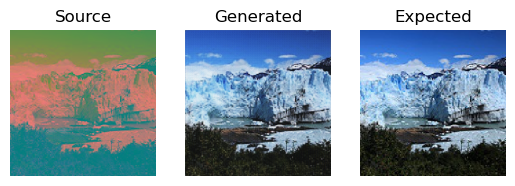

1/1 [==============================] - 0s 114ms/step


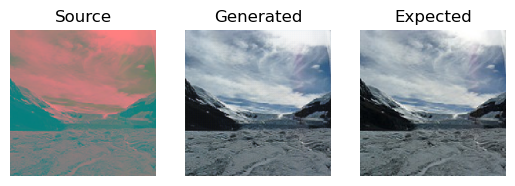

1/1 [==============================] - 0s 116ms/step


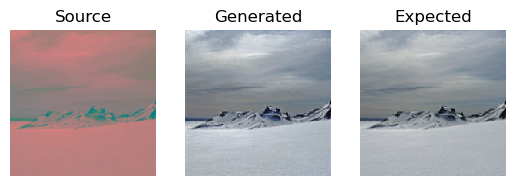

1/1 [==============================] - 0s 127ms/step


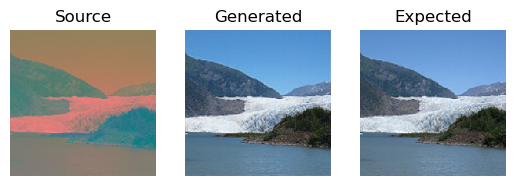

1/1 [==============================] - 0s 130ms/step


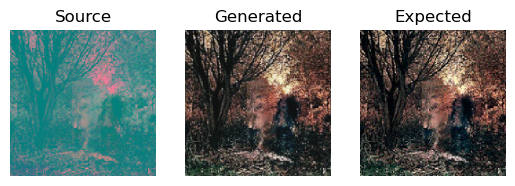

In [53]:
from keras.models import load_model
model=load_model('model_003000.h5')
[X1, X2] = data
for i in range(5):
    c=list()
    c.append(X1[i])
    src_image=asarray(list(c))
    c=list()
    c.append(X2[i])
    tar_image=asarray(list(c))
    gen_image= model.predict(src_image)
    plot_images(src_image, gen_image, tar_image)